# Importing the Libraries


The requests library (https://requests.readthedocs.io/en/master/) allows sending HTTP requests through Python, which will be used to obtain the dataset from the internet. Pandas (https://pandas.pydata.org/docs/) is an open-source Python library that provides powerful data structures and data analysis tools to deal with datasets.  The most essential ingredient in the process of exploratory data analysis of a dataset is understanding the data through visualizations. The matplotlib.pyplot (https://matplotlib.org/) and seaborn (https://seaborn.pydata.org/) packages for Python are the most popular and used packages for data visualization through Python.

In [84]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The Dataset


The code in this post will work on the dataset related to the coronavirus pandemic compiled by https://ourworldindata.org/coronavirus. Acknowledgments for this dataset must be given to Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina, and Joe Hasell.

In [85]:
filename = 'covid-data.csv'
data_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data_content = requests.get(data_url).content
csv_file = open(filename, 'wb')
csv_file.write(data_content)
csv_file.close()

Upon opening the file, you can notice that the dataset is huge as it contains values of various attributes for 210 different countries over a time period beginning from the 31st of December, 2019. We will load this data into a pandas DataFrame object, to make it easier to perform appropriate data extraction functions for our visualizations.

In [86]:
df = pd.read_csv(filename)
print(df.columns)
print(df.shape)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')
(47538, 41)


The column names indicate the various types of attributes that are present in the dataframe. The data has 22032 rows with 33 columns at the time of writing this post.

In [87]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


# The Impact of the Covid-19 Virus

The coronavirus has spread to over 200 countries having a disastrous effect on human life all over the world. While almost every country is dealing with this pandemic, there is no doubt that some countries have been impacted more than others. Let us visualize the situation in the top ten countries with the most number of cases of Covid-19.



In [88]:
total_cases = df.groupby('location')['new_cases'].sum()
total_cases = total_cases.sort_values(ascending=False)

most_affected_countries = total_cases[1:11].index # Top 10 Most Affected Countries


First, the number of cases is summed for every ‘location’ using the groupby and sum functions on the dataframe. Then the result is sorted in descending order, giving the country name with the total number of cases in descending order. The countries with index 1 to 11, are the top ten countries with the most number of cases. The zero index refers to the worldwide count, which is ignored.



We use the same method to obtain the total number of deaths of each country and select the values of the top ten most affected countries. The collected data is added to a new dataframe object cases_deaths_df whose output is given below

In [89]:
cases = total_cases[1:11].values # Number of Cases in Top 10 Countries 

total_deaths = df.groupby('location')['new_deaths'].sum()
deaths = total_deaths[most_affected_countries].values # Number of Deaths in Top 10 Countries

cases_deaths_df = pd.DataFrame({'Country': most_affected_countries, 'Total Cases': cases, 'Total Deaths': deaths})
print(cases_deaths_df)

         Country  Total Cases  Total Deaths
0  United States    7277814.0      207808.0
1          India    6394068.0       99773.0
2         Brazil    4847092.0      144680.0
3         Russia    1185231.0       20891.0
4       Colombia     835339.0       26196.0
5           Peru     818297.0       32535.0
6          Spain     778607.0       31973.0
7      Argentina     764989.0       20288.0
8         Mexico     748315.0       78078.0
9   South Africa     676084.0       16866.0


The above data is better visualized through a bar plot, where each country has one bar for the total number of cases and a second bar for the total number of deaths.



Before the data is plotted, it is converted into another form using the melt function where each country has two rows – one for total cases and the second for total deaths. This is now plotted using the barplot function of the seaborn library.

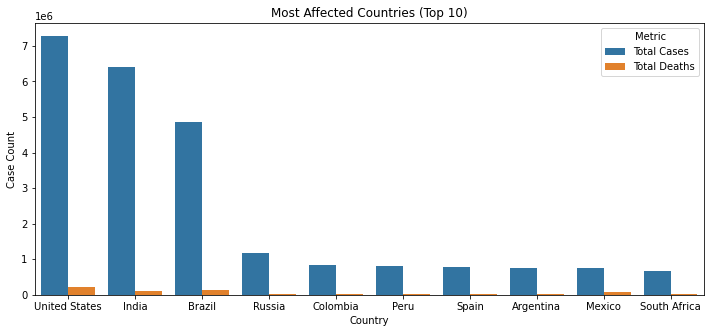

In [90]:
plot_data = pd.melt(cases_deaths_df, id_vars = ['Country'],  value_vars=['Total Cases', 'Total Deaths'], 
                var_name='Metric', value_name='Case Count') # Plot Friendly Format
plt.figure(figsize=(12, 5))
sns.barplot(x="Country", hue="Metric", y="Case Count", data=plot_data)
plt.title('Most Affected Countries (Top 10)')
plt.show()

Through the above visualization, it is evident that the United States is by far the most affected country with over a million total cases. We can also see that while Russia has the third-highest number of cases, it has a lower death count than countries like the United Kingdom and Spain. Between France and Turkey, Turkey has a slightly more number of cases, but a lower death rate than France.



# Countries Testing for Covid-19 the Most

The dataset contains a column – total_tests_per_thousand that can be an indicative measure of the number of tests done by a country. However, for the purposes of this post, the testing rate is defined as the count of the total tests done divided by the total population of the country. This testing rate is calculated for each country and sorted in a descending order, to get the top ten countries with the best testing rates.



In [91]:
total_tests = df.groupby('location')['new_tests'].sum().values
population = df.groupby('location')['population'].nth(-1)
testing_rate = (total_tests/population).sort_values(ascending = False)[:10]


The value of this testing rate can be visualized best using a bar plot, and hence the barplot method of the seaborn library is called again, however with the argument ‘h’ for orient. This indicates a horizontal bar plot instead of a vertical one as the one given above.



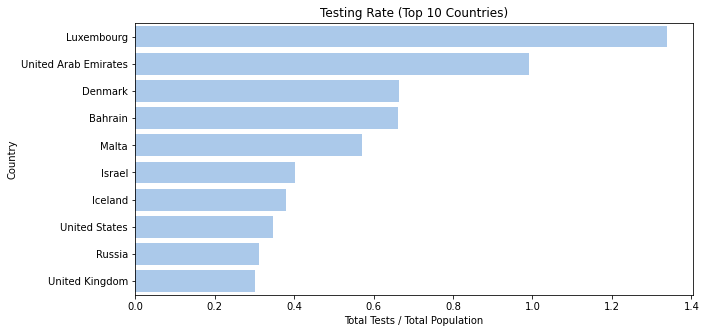

In [92]:
plt.figure(figsize=(10, 5))
sns.set_color_codes("pastel")
sns.barplot(y = testing_rate.index, x = testing_rate.values, orient = "h", color="b")
plt.title('Testing Rate (Top 10 Countries)')
plt.xlabel('Total Tests / Total Population')
plt.ylabel('Country')
plt.show()


# Hence, according to our definition of the testing rate, Iceland is the country testing the most with more than 0.16% of the population tested.

# Comparing the Rate of Increase of the Coronavirus Disease


Let us now compare the rate of increase of coronavirus cases between the two countries. This will be a date series visualization with the dates in increasing order of time on the X-axis, and the number of cases on the Y-axis. While this post shows the result of a comparison between the data of India and Germany, any two countries can be compared as given in the dataset.

First, the date and total cases columns are extracted from each country’s data to form two separate dataframes. These two dataframes are then merged into a single dataframe using an ‘inner join’ operation on the date column. An inner join ensures that only those date values are included which are present in both dataframes being merged.

In [93]:
country1 = 'India'
country1_data = df.loc[df['location'] == country1]
country1_cases = country1_data[['date','total_cases']]

country2 = 'Germany'
country2_data = df.loc[df['location'] == country2]
country2_cases = country2_data[['date','total_cases']]

datewise_cases = country1_cases.merge(country2_cases, how = 'inner', on = 'date') 
print(datewise_cases.tail())

           date  total_cases_x  total_cases_y
272  2020-09-28      6074702.0       285332.0
273  2020-09-29      6145291.0       287421.0
274  2020-09-30      6225763.0       289219.0
275  2020-10-01      6312584.0       291722.0
276  2020-10-02      6394068.0       294395.0


This dataframe is now used to plot a line chart using the plot function of the matplotlib.pyplot library. The first country’s data is plotted using a blue coloured line while the second country’s data is plotted using a red coloured line.



The xticks functions helps add the markings on the X-axis, the xlabel and ylabel functions add labels to the X-axis and Y-axis respectively and the legend function adds a legend for the graph which shows which colour indicates which country.

Comparing United States Of America and China in terms of rate of increase of the virus.

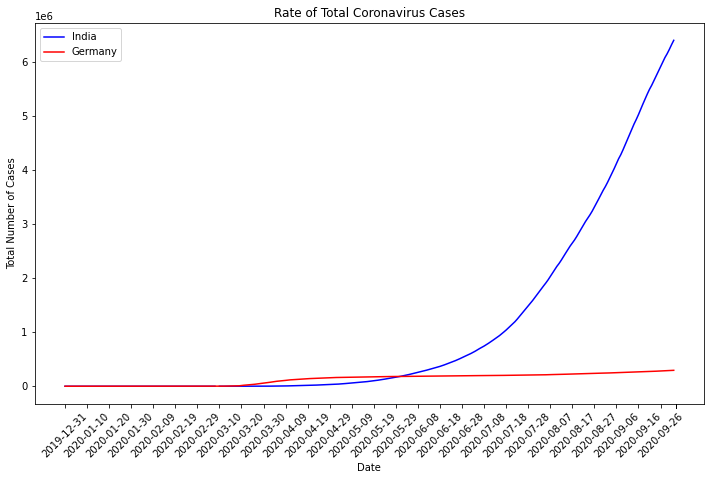

In [94]:
plt.figure(figsize=(12, 7))
plt.plot(datewise_cases['date'].values, datewise_cases['total_cases_x'].values, color='blue', label=country1)
plt.plot(datewise_cases['date'].values, datewise_cases['total_cases_y'].values, color='red', label=country2)
plt.xticks([datewise_cases['date'][i] if i%10 == 0 else '' for i in range(len(datewise_cases.index))], rotation = 45)
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.title('Rate of Total Coronavirus Cases')
plt.legend()
plt.show()

In [95]:
country1 = 'United States'
country1_data = df.loc[df['location'] == country1]
country1_cases = country1_data[['date','total_cases']]

country2 = 'China'
country2_data = df.loc[df['location'] == country2]
country2_cases = country2_data[['date','total_cases']]

datewise_cases = country1_cases.merge(country2_cases, how = 'inner', on = 'date') 
print(datewise_cases.tail())

           date  total_cases_x  total_cases_y
272  2020-09-28      7115046.0        90483.0
273  2020-09-29      7148044.0        90505.0
274  2020-09-30      7191061.0        90528.0
275  2020-10-01      7233043.0        90528.0
276  2020-10-02      7277814.0        90567.0


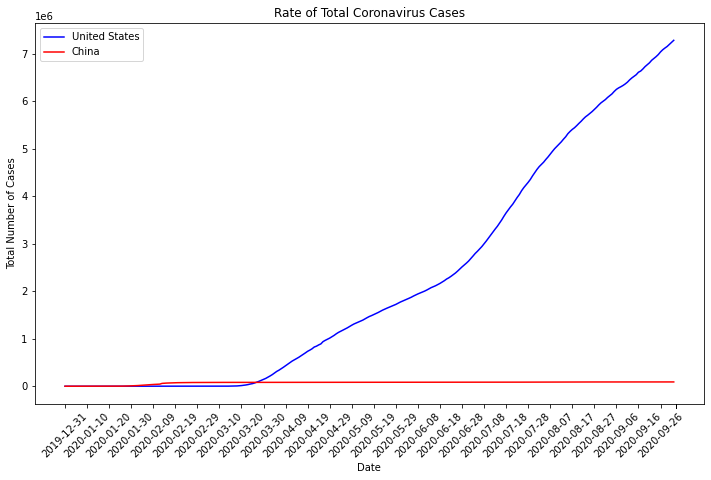

In [96]:
plt.figure(figsize=(12, 7))
plt.plot(datewise_cases['date'].values, datewise_cases['total_cases_x'].values, color='blue', label=country1)
plt.plot(datewise_cases['date'].values, datewise_cases['total_cases_y'].values, color='red', label=country2)
plt.xticks([datewise_cases['date'][i] if i%10 == 0 else '' for i in range(len(datewise_cases.index))], rotation = 45)
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.title('Rate of Total Coronavirus Cases')
plt.legend()
plt.show()

# Degree of Correlation between Cases and Various Factors

This dataset provided by the World in Data organization has many different attributes related to not only coronavirus but also a country’s health features. We can calculate the degree of correlation between such features and the total number of cases to see if there is any correlation effect. A degree of correlation indicates how a change in one variable affects another variable and can be positive or negative. Let us see if the features – population density, median age, diabetes prevalence, stringency index, cardiovascular death rates and population aged 70 or older; of a country have any correlation to the total number of cases in the country. This correlation calculation is performed on the top ten most affected countries only.

The features for the respective countries are extracted using the groupby function and nth or mean functions. The nth function returns the nth value of the group, -1 indicating the last value. This data is compiled into the df_corr dataframe as given below.

In [97]:
df_corr = pd.DataFrame(most_affected_countries.values, columns = ['Country'])
df_corr['Total Cases'] = cases

pop_density = df.groupby('location')['population_density'].nth(-1)
df_corr['Population Density'] = pop_density[most_affected_countries].values

median_age = df.groupby('location')['median_age'].nth(-1)
df_corr['Median Age'] = median_age[most_affected_countries].values

diabetes_prevalence = df.groupby('location')['diabetes_prevalence'].nth(-1)
df_corr['Diabetes Prevelance'] = diabetes_prevalence[most_affected_countries].values

stringency_index = df.groupby('location')['stringency_index'].mean()
df_corr['Stringency Index'] = stringency_index[most_affected_countries].values

cvd_death_rate = df.groupby('location')['cardiovasc_death_rate'].nth(-1)
df_corr['Cardiovascular Death Rate'] = cvd_death_rate[most_affected_countries].values

aged_70_older = df.groupby('location')['aged_70_older'].nth(-1)
df_corr['Aged 70 or older'] = aged_70_older[most_affected_countries].values

print(df_corr.head())


         Country  Total Cases  Population Density  Median Age  \
0  United States    7277814.0              35.608        38.3   
1          India    6394068.0             450.419        28.2   
2         Brazil    4847092.0              25.040        33.5   
3         Russia    1185231.0               8.823        39.6   
4       Colombia     835339.0              44.223        32.2   

   Diabetes Prevelance  Stringency Index  Cardiovascular Death Rate  \
0                10.79         51.942132                    151.089   
1                10.39         62.271795                    282.280   
2                 8.11         56.261729                    177.961   
3                 6.18         52.227164                    431.297   
4                 7.44         78.325459                    124.240   

   Aged 70 or older  
0             9.732  
1             3.414  
2             5.060  
3             9.393  
4             4.312  


The correlations between the variables are computed using the corr function which is a pandas DataFrame function to calculate correlation values in the dataframe. The best way to visualize correlation values is a heat map which is plotted using the heatmap function of the seaborn library.



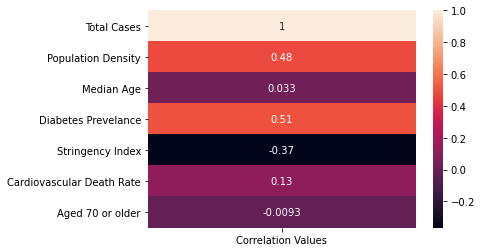

In [98]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Total Cases'].values}, index = df_corr.corr()['Total Cases'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

Hence, we see that most attributes have negative correlations with the total number of cases while one attribute has a positive correlation. The total number of cases obviously has a direct correlation value of 1 with itself. However, none of the correlation values are high correlation values which are usually greater than 0.6 or lesser than -0.6. Perhaps, this goes to show how devastatingly widespread the effects of this contagious disease is.

As the world continues to become more data-centric, understanding a pandemic in terms of data can be a pivotal advantage for containing it. Please note that all the graphs presented in this post are updated until 5 june 2020. You can always run the code yourself with the updated data and perform your analysis and/or predictions on the evolution of this pandemic and its effect on countries worldwide. 